# The Shape of NBA Offense
Is there a single formula capable of creating a good NBA offense? Are there hard and fast strategic rules which every team must implement in order to create a championship capable offenses?

In [1]:
import pandas as pd
import numpy as np

Lets take offensive style and quality data from 2014-2020. This is just a little section of me familiarizing myself with the data.

In [2]:
data = pd.read_csv('offense.csv')


In [3]:
print ("Data shape:", data.shape)

Data shape: (210, 12)


In [4]:
data.head()

,ORTGRank,Team,ORTG,Morey,Pace,BallMove,PlayerMove,MoreyRank,PaceRank,BallRank,Player Rank,Year
0,1,Los Angeles Clippers,111.3,0.432808,96.66,2.80,8.61,8,8,26,28,2014
1,2,Portland Trail Blazers,110.4,0.443299,95.90,3.05,9.33,3,10,15,4,2014
2,3,Miami Heat,110.0,0.409002,91.90,3.09,8.60,15,27,14,29,2014
3,4,Houston Rockets,109.8,0.469824,97.27,2.93,8.81,1,6,22,22,2014
4,6,Dallas Mavericks,109.5,0.412214,94.94,2.97,8.93,12,15,20,17,2014


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
data.ORTG.describe()

count    210.000000
mean     107.376190
std        3.660928
min       94.900000
25%      104.700000
50%      107.250000
75%      110.200000
max      115.800000
Name: ORTG, dtype: float64

Lets find out what the distribution for each of these variables looks like. First ORTG, then the "Morey Percentage," then the team's pace, then the average distance traveled on offense over the course of a game, then the average touch time of each ball possession.

Skew is: -0.14447389013307532


(array([ 1.,  3.,  4., 17., 43., 41., 38., 34., 23.,  6.]),
 array([ 94.9 ,  96.99,  99.08, 101.17, 103.26, 105.35, 107.44, 109.53,
        111.62, 113.71, 115.8 ]),
 <a list of 10 Patch objects>)

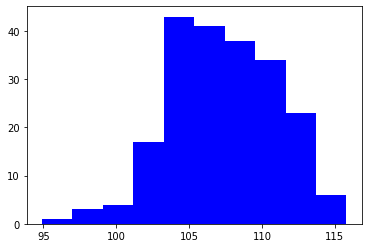

In [9]:
print ("Skew is:", data.ORTG.skew()) #prints skew of our data
plt.hist(data.ORTG, color='blue') #histogram of our data

Skew is: 0.23132269180671614


(array([ 3., 10., 24., 44., 44., 46., 24., 10.,  3.,  2.]),
 array([0.31009365, 0.33843459, 0.36677554, 0.39511648, 0.42345742,
        0.45179836, 0.4801393 , 0.50848025, 0.53682119, 0.56516213,
        0.59350307]),
 <a list of 10 Patch objects>)

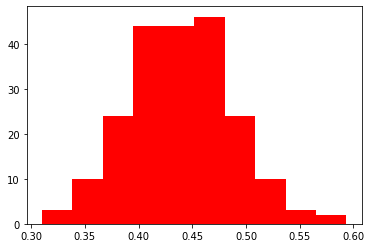

In [14]:
print ("Skew is:", data.Morey.skew())
plt.hist(data.Morey, color='red')


Skew is: 0.12742261662945342


(array([ 7., 17., 21., 32., 44., 37., 24., 13., 10.,  5.]),
 array([ 90.58 ,  92.058,  93.536,  95.014,  96.492,  97.97 ,  99.448,
        100.926, 102.404, 103.882, 105.36 ]),
 <a list of 10 Patch objects>)

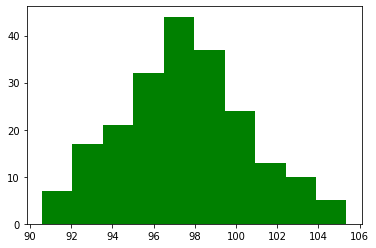

In [15]:
print ("Skew is:", data.Pace.skew())
plt.hist(data.Pace, color='green')


Skew is: 0.28259943537244875


(array([10., 23., 38., 31., 25., 27., 19., 21., 12.,  4.]),
 array([ 8.49,  8.67,  8.85,  9.03,  9.21,  9.39,  9.57,  9.75,  9.93,
        10.11, 10.29]),
 <a list of 10 Patch objects>)

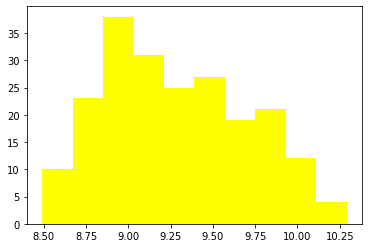

In [16]:
print ("Skew is:", data.PlayerMove.skew())
plt.hist(data.PlayerMove, color='yellow')


Skew is: -0.00537883789605475


(array([ 9., 15., 22., 38., 42., 42., 25., 11.,  4.,  2.]),
 array([2.59 , 2.686, 2.782, 2.878, 2.974, 3.07 , 3.166, 3.262, 3.358,
        3.454, 3.55 ]),
 <a list of 10 Patch objects>)

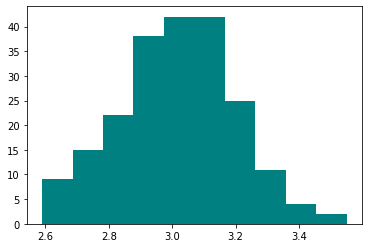

In [17]:
print ("Skew is:", data.BallMove.skew())
plt.hist(data.BallMove, color='teal')

In [21]:
data.corr()

,ORTGRank,ORTG,Morey,Pace,BallMove,PlayerMove,MoreyRank,PaceRank,BallRank,Player Rank,Year
ORTGRank,1.000000,-0.823889,-0.286581,-0.062012,-0.123880,0.222560,0.436235,0.095122,0.125521,-0.327443,0.000000
ORTG,-0.823889,1.000000,0.545056,0.417175,0.107043,0.138066,-0.350153,-0.080757,-0.103615,0.299199,0.488746
Morey,-0.286581,0.545056,1.000000,0.520141,-0.000893,0.300889,-0.667192,-0.158577,-0.002070,0.076153,0.584636
Pace,-0.062012,0.417175,0.520141,1.000000,-0.243005,0.433067,-0.132498,-0.664263,0.239357,0.136771,0.708673
BallMove,-0.123880,0.107043,-0.000893,-0.243005,1.000000,-0.124009,0.076239,0.344088,-0.954650,0.162466,-0.003051
PlayerMove,0.222560,0.138066,0.300889,0.433067,-0.124009,1.000000,0.098466,0.126933,0.117577,-0.638832,0.648961
MoreyRank,0.436235,-0.350153,-0.667192,-0.132498,0.076239,0.098466,1.000000,0.195264,-0.038743,-0.122411,0.001912
PaceRank,0.095122,-0.080757,-0.158577,-0.664263,0.344088,0.126933,0.195264,1.000000,-0.342806,-0.202733,0.000000
BallRank,0.125521,-0.103615,-0.002070,0.239357,-0.954650,0.117577,-0.038743,-0.342806,1.000000,-0.134484,-0.001376
Player Rank,-0.327443,0.299199,0.076153,0.136771,0.162466,-0.638832,-0.122411,-0.202733,-0.134484,1.000000,0.000000


All I want to see is how these variables correlate to ORTG.

In [22]:
corr = data.corr()

In [23]:
print(corr['ORTG'])

ORTGRank      -0.823889
ORTG           1.000000
Morey          0.545056
Pace           0.417175
BallMove       0.107043
PlayerMove     0.138066
MoreyRank     -0.350153
PaceRank      -0.080757
BallRank      -0.103615
Player Rank    0.299199
Year           0.488746
Name: ORTG, dtype: float64


In [24]:
data.Year.value_counts()

2020    30
2019    30
2018    30
2017    30
2016    30
2015    30
2014    30
Name: Year, dtype: int64

Checking for nulls because I don't want any Nulls or it might cause my model to fail.

In [25]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
Year,0
Player Rank,0
BallRank,0
PaceRank,0
MoreyRank,0
PlayerMove,0
BallMove,0
Pace,0
Morey,0


y=independent variable
X=dependent variables

In [27]:
y = data.ORTG
X = data[['Morey', 'Pace', 'BallMove', 'PlayerMove']]

Separate into training and testing set.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

Now lets make our linear model.

In [29]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [30]:
model = lr.fit(X_train, y_train)

In [31]:
pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  

,Coefficient
Morey,28.274019
Pace,0.353137
BallMove,4.209053
PlayerMove,-1.131052


In [33]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.3325030179046826


In [35]:
predictions = model.predict(X_test)

In [36]:
pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

,Actual,Predicted
30,111.6,107.514469
172,107.5,109.961303
84,103.8,106.503488
199,108.9,107.942466
60,113.5,108.077867
...,...,...
205,106.9,108.461315
208,105.8,109.039326
31,110.4,106.840893
12,106.2,104.713813


In [37]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions)**0.5)

RMSE is: 
 2.8052001362572576


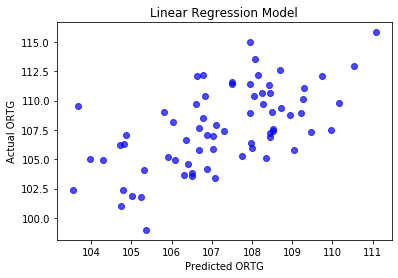

In [38]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted ORTG')
plt.ylabel('Actual ORTG')
plt.title('Linear Regression Model')
plt.show()

This is where the illustrations will be, the low correlation has helped us conclude that there isn't really a hard and fast rule for this stuff.

In [ ]:
import turtle